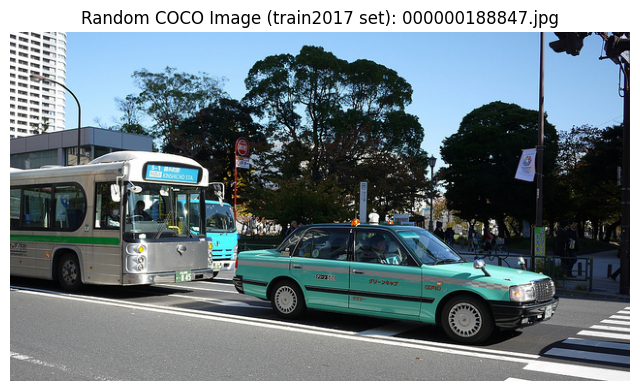

Loaded 29571 images and 147935 annotations from C:\Users\HP\Desktop\datasets\coco2017_subset\annotation_subset\captions_train2017_subset.json.


In [20]:
import os
import random
import json
import matplotlib.pyplot as plt
from PIL import Image

# Set dataset path
coco_base_path = r"C:\Users\HP\Desktop\datasets\coco2017_subset"

# Choose a dataset split: "train", "val", or "test"
split = "train2017"  # Change to "train" or "test" if needed

# Paths
coco_images_path = os.path.join(coco_base_path, split)
annotation_file =os.path.join(coco_base_path, "annotation_subset", f"captions_{split}_subset.json")

# Load annotations
if not os.path.exists(annotation_file):
    print(f"Annotation file not found: {annotation_file}")
    annotations = None
else:
    with open(annotation_file, "r") as f:
        annotations = json.load(f)

# Get all image filenames
image_files = [f for f in os.listdir(coco_images_path) if f.endswith(".jpg")]

# Ensure images exist
if not image_files:
    print(f"No images found in {coco_images_path}")
else:
    # Select a random image
    random_image = random.choice(image_files)

    # Load and display the image
    image_path = os.path.join(coco_images_path, random_image)
    image = Image.open(image_path)

    # Show image
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Random COCO Image ({split} set): {random_image}")
    plt.show()

    # Display annotation info (if available)
    if annotations:
        print(f"Loaded {len(annotations['images'])} images and {len(annotations['annotations'])} annotations from {annotation_file}.")


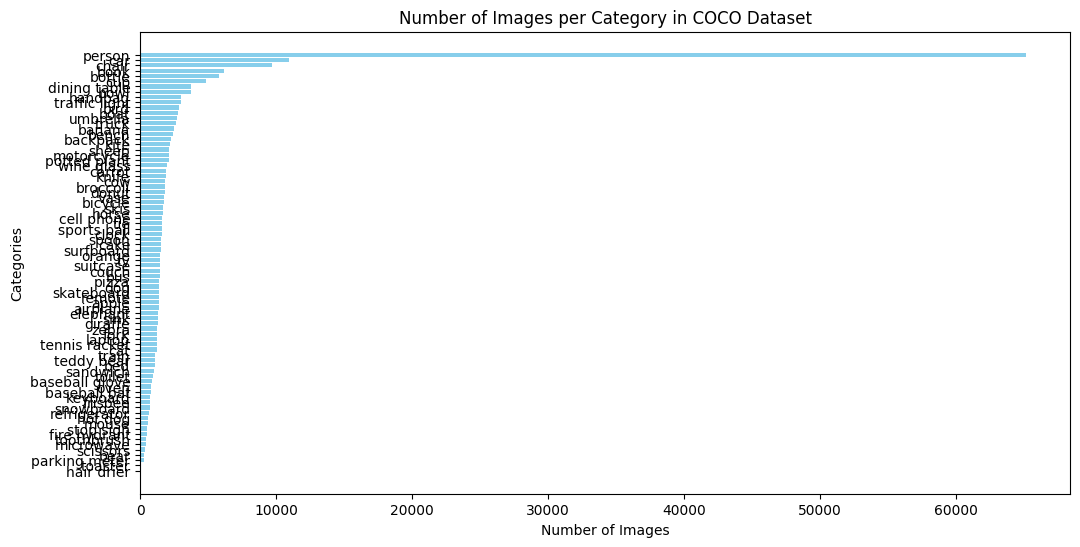

In [24]:

from collections import Counter

import cv2
import numpy as np
from PIL import ImageDraw

# Load annotation file
annotation_file = os.path.join(coco_base_path, "annotation_subset", f"instances_{split}_subset.json")
with open(annotation_file, "r") as f:
    annotations = json.load(f)

# Count images per category
category_counts = Counter()
for ann in annotations["annotations"]:
    category_id = ann["category_id"]
    category_counts[category_id] += 1

# Get category names
category_names = {cat["id"]: cat["name"] for cat in annotations["categories"]}

# Sort categories
sorted_categories = sorted(category_counts.keys(), key=lambda x: category_counts[x], reverse=True)
sorted_counts = [category_counts[cat_id] for cat_id in sorted_categories]
sorted_labels = [category_names[cat_id] for cat_id in sorted_categories]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(sorted_labels, sorted_counts, color="skyblue")
plt.xlabel("Number of Images")
plt.ylabel("Categories")
plt.title("Number of Images per Category in COCO Dataset")
plt.gca().invert_yaxis()
plt.show()


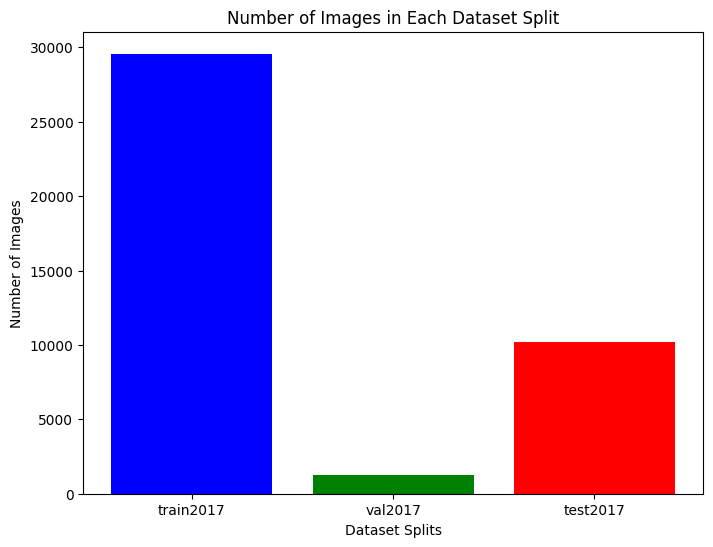

In [25]:


# Dataset splits
splits = ["train2017", "val2017", "test2017"]
split_counts = {}

for split in splits:
    split_path = os.path.join(coco_base_path, split)
    if os.path.exists(split_path):
        split_counts[split] = len([f for f in os.listdir(split_path) if f.endswith(".jpg")])
    else:
        split_counts[split] = 0

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(split_counts.keys(), split_counts.values(), color=["blue", "green", "red"])
plt.xlabel("Dataset Splits")
plt.ylabel("Number of Images")
plt.title("Number of Images in Each Dataset Split")
plt.show()


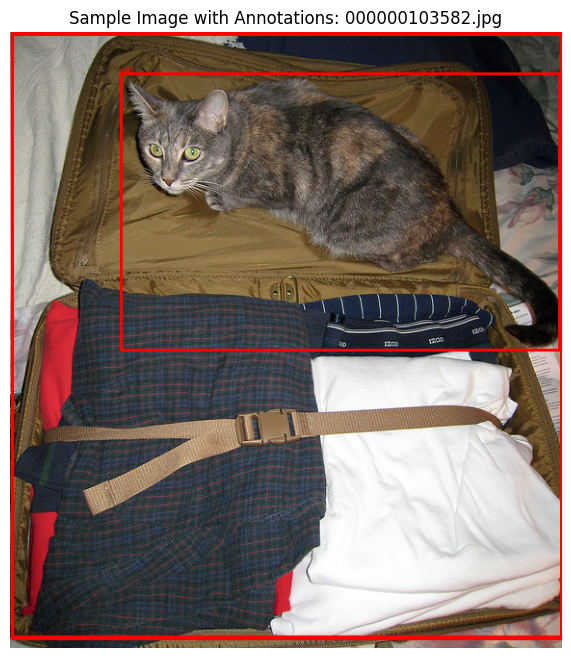

In [27]:


# Select a random image
random_image = random.choice(image_files)
image_path = os.path.join(coco_images_path, random_image)

# Open image
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Find annotations for the selected image
image_id = None
for img in annotations["images"]:
    if img["file_name"] == random_image:
        image_id = img["id"]
        break

if image_id is not None:
    bboxes = [ann for ann in annotations["annotations"] if ann["image_id"] == image_id]

    # Draw bounding boxes
    for ann in bboxes:
        bbox = ann["bbox"]
        category_id = ann["category_id"]
        category_name = category_names[category_id]

        x, y, w, h = bbox
        draw.rectangle([x, y, x + w, y + h], outline="red", width=3)
        draw.text((x, y - 10), category_name, fill="red")

# Show image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.title(f"Sample Image with Annotations: {random_image}")
plt.show()


In [30]:


# Count objects per image
image_object_counts = [0] * len(annotations["images"])
for ann in annotations["annotations"]:
    image_object_counts[ann["image_id"] - 1] += 1  # Assuming image IDs start from 1

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(image_object_counts, bins=20, color="orange", edgecolor="black")
plt.xlabel("Number of Objects per Image")
plt.ylabel("Frequency")
plt.title("Distribution of Objects per Image")
plt.show()


IndexError: list index out of range

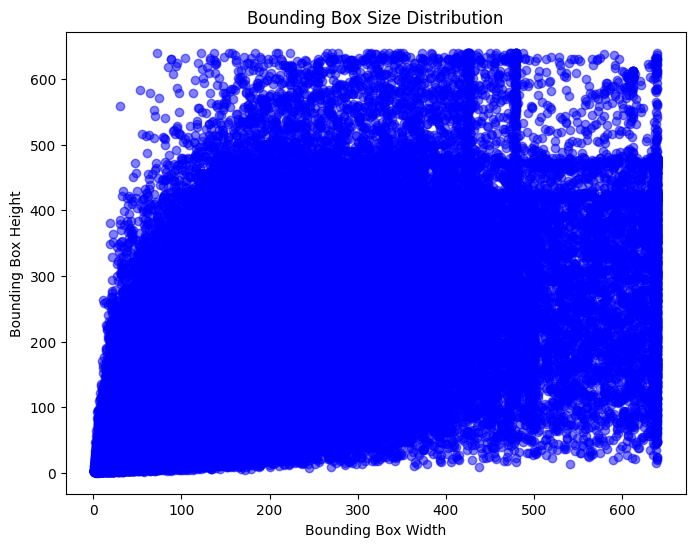

In [31]:


# Get bounding box sizes
widths = [ann["bbox"][2] for ann in annotations["annotations"]]
heights = [ann["bbox"][3] for ann in annotations["annotations"]]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5, color="blue")
plt.xlabel("Bounding Box Width")
plt.ylabel("Bounding Box Height")
plt.title("Bounding Box Size Distribution")
plt.show()


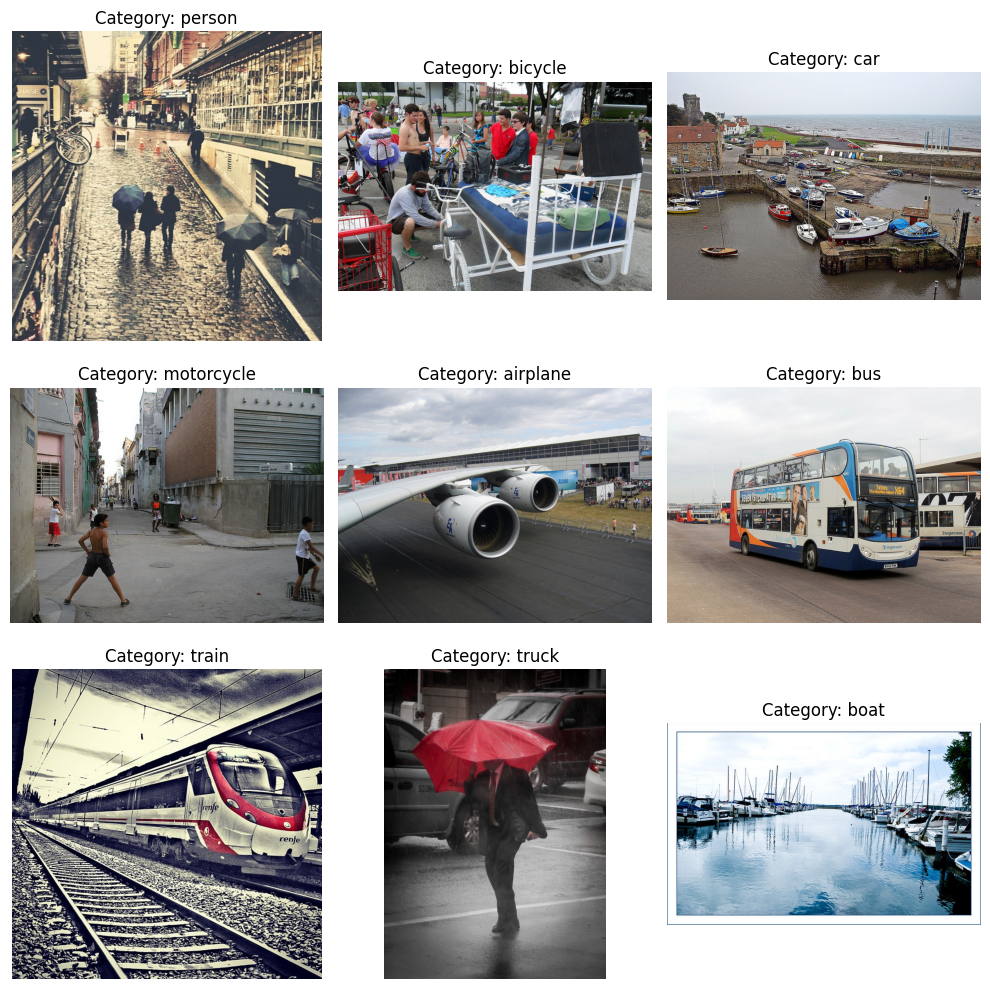

In [32]:


# Get images per category
category_images = {cat["id"]: [] for cat in annotations["categories"]}
for ann in annotations["annotations"]:
    category_images[ann["category_id"]].append(ann["image_id"])

# Show sample images per category
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Adjust grid as needed

for i, (category_id, image_ids) in enumerate(category_images.items()):
    if i >= 9:  # Show only 9 categories
        break
    
    random_image_id = random.choice(image_ids)
    image_info = next(img for img in annotations["images"] if img["id"] == random_image_id)
    image_path = os.path.join(coco_images_path, image_info["file_name"])
    image = Image.open(image_path)
    
    ax = axes[i // 3, i % 3]
    ax.imshow(image)
    ax.set_title(f"Category: {category_names[category_id]}")
    ax.axis("off")

plt.tight_layout()
plt.show()


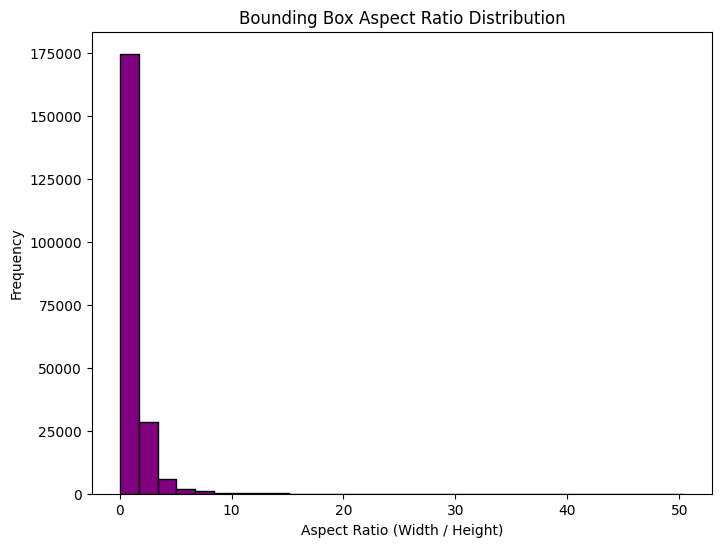

In [33]:
aspect_ratios = [w / h for w, h in zip(widths, heights) if h > 0]

plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=30, color="purple", edgecolor="black")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Bounding Box Aspect Ratio Distribution")
plt.show()


❌ Error: Annotation file not found -> C:\Users\HP\Desktop\datasets\coco2017_subset\annotation_subset\instances_test2017_subset.json
📂 Available Categories:
- person (ID: 1)
- bicycle (ID: 2)
- car (ID: 3)
- motorcycle (ID: 4)
- airplane (ID: 5)
- bus (ID: 6)
- train (ID: 7)
- truck (ID: 8)
- boat (ID: 9)
- traffic light (ID: 10)
- fire hydrant (ID: 11)
- stop sign (ID: 13)
- parking meter (ID: 14)
- bench (ID: 15)
- bird (ID: 16)
- cat (ID: 17)
- dog (ID: 18)
- horse (ID: 19)
- sheep (ID: 20)
- cow (ID: 21)
- elephant (ID: 22)
- bear (ID: 23)
- zebra (ID: 24)
- giraffe (ID: 25)
- backpack (ID: 27)
- umbrella (ID: 28)
- handbag (ID: 31)
- tie (ID: 32)
- suitcase (ID: 33)
- frisbee (ID: 34)
- skis (ID: 35)
- snowboard (ID: 36)
- sports ball (ID: 37)
- kite (ID: 38)
- baseball bat (ID: 39)
- baseball glove (ID: 40)
- skateboard (ID: 41)
- surfboard (ID: 42)
- tennis racket (ID: 43)
- bottle (ID: 44)
- wine glass (ID: 46)
- cup (ID: 47)
- fork (ID: 48)
- knife (ID: 49)
- spoon (ID: 50)
- b

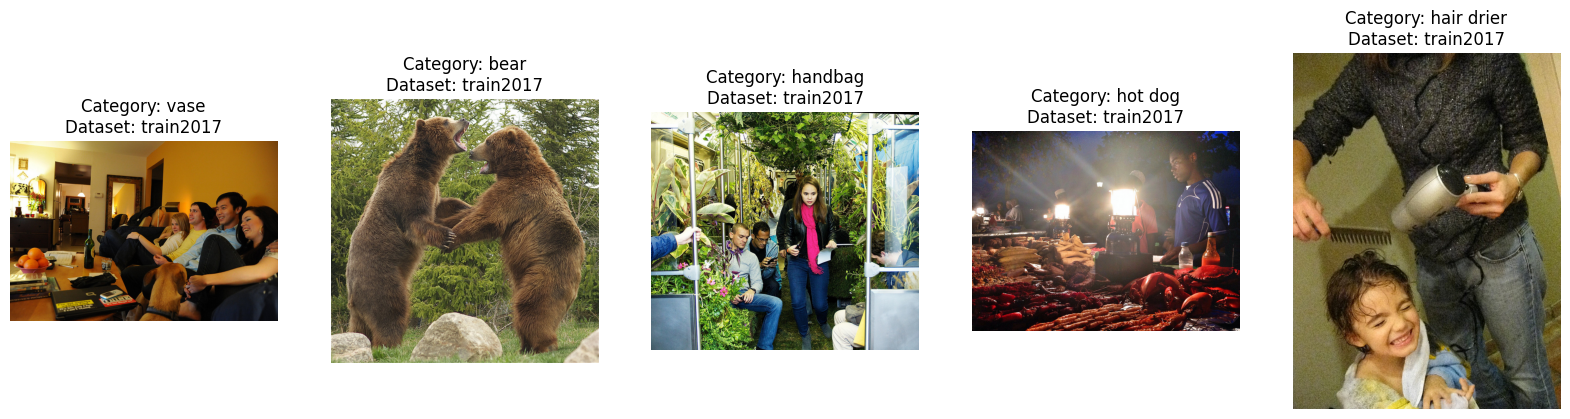

In [22]:


# Set dataset base path
coco_base_path = r"C:\Users\HP\Desktop\datasets\coco2017_subset"

# Define dataset splits
splits = ["train2017", "val2017", "test2017"]

# Load category (class) information
annotation_files = {
    split: os.path.join(coco_base_path, "annotation_subset", f"instances_{split}_subset.json")
    for split in splits
}

# Dictionary to store annotations
annotations = {}

# Load annotations
for split, annotation_file in annotation_files.items():
    if os.path.exists(annotation_file):
        with open(annotation_file, "r") as f:
            annotations[split] = json.load(f)
    else:
        print(f"❌ Error: Annotation file not found -> {annotation_file}")

# Collect all category names
categories = {}
for split, data in annotations.items():
    for category in data["categories"]:
        categories[category["id"]] = category["name"]

# Print available categories
print("📂 Available Categories:")
for cat_id, cat_name in categories.items():
    print(f"- {cat_name} (ID: {cat_id})")

# Function to get a random image from a given category
def get_random_image_by_category(category_id, split):
    image_ids = [
        ann["image_id"]
        for ann in annotations[split]["annotations"]
        if ann["category_id"] == category_id
    ]
    
    if not image_ids:
        return None, None, None

    random_image_id = random.choice(image_ids)
    
    # Find image filename
    image_info = next(
        (img for img in annotations[split]["images"] if img["id"] == random_image_id),
        None,
    )

    if not image_info:
        return None, None, None

    image_filename = image_info["file_name"]
    image_path = os.path.join(coco_base_path, split, image_filename)
    
    return image_filename, image_path, split

# Select random categories to display
random_categories = random.sample(list(categories.keys()), min(5, len(categories)))  # Show up to 5 categories

# Plot images for selected categories
fig, axes = plt.subplots(1, len(random_categories), figsize=(20, 5))

for i, category_id in enumerate(random_categories):
    category_name = categories[category_id]

    # Try to get an image from any available split
    for split in splits:
        image_filename, image_path, dataset_split = get_random_image_by_category(category_id, split)
        if image_path and os.path.exists(image_path):
            break  # Stop if an image is found

    if image_path and os.path.exists(image_path):
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(f"Category: {category_name}\nDataset: {dataset_split}")
    else:
        axes[i].set_title(f"Category: {category_name}\n(No Image Found)")
        axes[i].axis("off")

plt.show()
